<a href="https://colab.research.google.com/github/dinhtiendat2k3/bai-tap/blob/main/Bu%E1%BB%95i_4_2(covid).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Đường link đến file dữ liệu
url = "https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/dpc-covid19-ita-regioni.csv"

# Sử dụng pandas để đọc dữ liệu từ đường link
df = pd.read_csv(url)

# Hiển thị một số dòng đầu tiên của dữ liệu để kiểm tra
print(df.head())

                  data stato  codice_regione denominazione_regione        lat  \
0  2020-02-24T18:00:00   ITA              13               Abruzzo  42.351222   
1  2020-02-24T18:00:00   ITA              17            Basilicata  40.639471   
2  2020-02-24T18:00:00   ITA              18              Calabria  38.905976   
3  2020-02-24T18:00:00   ITA              15              Campania  40.839566   
4  2020-02-24T18:00:00   ITA               8        Emilia-Romagna  44.494367   

        long  ricoverati_con_sintomi  terapia_intensiva  totale_ospedalizzati  \
0  13.398438                       0                  0                     0   
1  15.805148                       0                  0                     0   
2  16.594402                       0                  0                     0   
3  14.250850                       0                  0                     0   
4  11.341721                      10                  2                    12   

   isolamento_domiciliare 

In [2]:
# Xóa các cột không cần thiết
columns_to_drop = ['note', 'note_test', 'note_casi']
df.drop(columns=columns_to_drop, inplace=True)

In [3]:
# Các cột cần thay thế giá trị bị thiếu bằng giá trị trung bình
columns_to_fill = ['ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati',
                   'isolamento_domiciliare', 'totale_positivi', 'nuovi_positivi',
                   'dimessi_guariti', 'deceduti', 'totale_casi', 'casi_testati']

# Thay thế các giá trị bị thiếu bằng giá trị trung bình của cột đó
for column in columns_to_fill:
    mean_value = df[column].mean()  # Tính giá trị trung bình của cột
    df[column].fillna(mean_value, inplace=True)  # Thay thế giá trị bị thiếu bằng giá trị trung bình

# Hiển thị thông tin của DataFrame sau khi thay thế
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20286 entries, 0 to 20285
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    20286 non-null  object 
 1   stato                                   20286 non-null  object 
 2   codice_regione                          20286 non-null  int64  
 3   denominazione_regione                   20286 non-null  object 
 4   lat                                     20286 non-null  float64
 5   long                                    20286 non-null  float64
 6   ricoverati_con_sintomi                  20286 non-null  int64  
 7   terapia_intensiva                       20286 non-null  int64  
 8   totale_ospedalizzati                    20286 non-null  int64  
 9   isolamento_domiciliare                  20286 non-null  int64  
 10  totale_positivi                         20286 non-null  in

<ipython-input-11-80f55c6a2a3f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['data'] = pd.to_datetime(selected_data['data'])


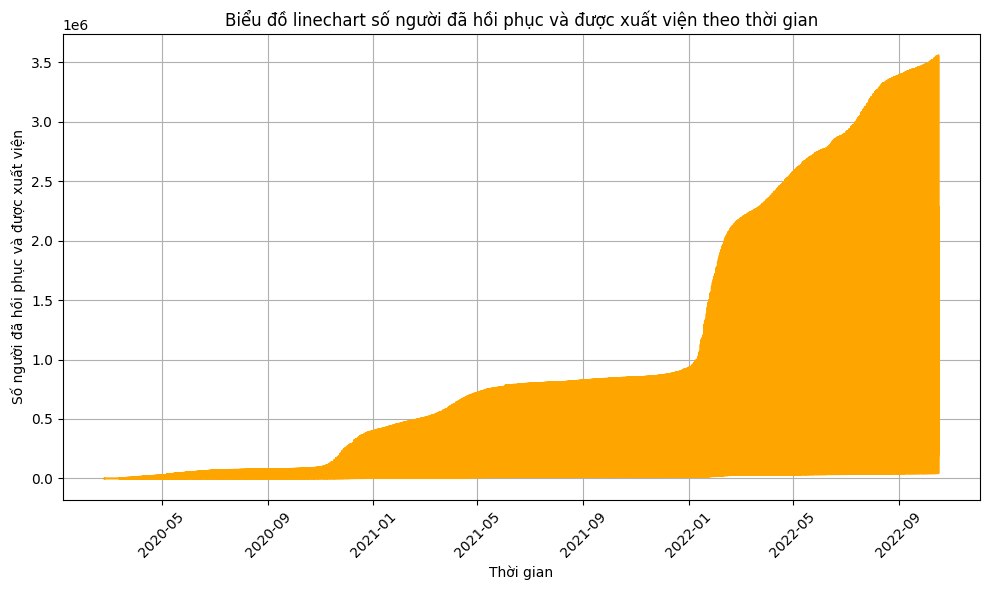

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Chọn cột 'data' và 'dimessi_guariti' để vẽ biểu đồ linechart
selected_columns = ['data', 'dimessi_guariti']

# Lấy dữ liệu từ các cột đã chọn
selected_data = df[selected_columns]

# Chuyển cột 'data' sang định dạng datetime
selected_data['data'] = pd.to_datetime(selected_data['data'])

# Sắp xếp dữ liệu theo cột 'data'
selected_data = selected_data.sort_values(by='data')

# Vẽ biểu đồ linechart
plt.figure(figsize=(10, 6))
plt.plot(selected_data['data'], selected_data['dimessi_guariti'], color='orange', linestyle='-')
plt.title('Biểu đồ linechart số người đã hồi phục và được xuất viện theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số người đã hồi phục và được xuất viện')
plt.grid(True)
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
plt.tight_layout()  # Đảm bảo nhãn không bị chồng lên nhau
plt.show()


Kết hợp dữ liệu từ 2 cột 'dimessi_guariti' và 'data', ta đã vẽ được biểu đồ line chart biểu diễn số người đã hồi phục và xuất viện dựa trên thời gian.
Biểu đồ thể hiện rõ được số người xuất viện và hồi phục tăng mạnh trong khoảng thời gian 2020 - 05 đến 2022 - 09, nó thể hiện một xu hướng tích cực trong quá trình hồi phục của bệnh nhân COVID-19, phản ánh sự tiến triển và hiệu quả của các biện pháp điều trị và quản lý bệnh tại thời điểm đó.
Biểu đồ linechart đã thể hiện rõ ràng và hiệu quả trong việc phân tích dữ liệu về covid 19

